## Labo Week 2 : Matplotlib en Numpy

#### **Deel 1 : quickstart numpy**

Om te rekenen met matrices is de numpy module aangewezen wegens de efficiente manier waarop array operaties zonder loops afgehandeld worden (vectorization). Een numpy array is een ndarray, waarmee je in het algemeen n-dimensionele matrices kan aanmaken. 

Merk het verschil tussen de puntsgewijze vermenigvuldiging en de dot vermenigvuldiging. Merk al helemaal het verschil tussen de tijd nodig om de elementen van een array te verdubbelen (gebruik ipython magic functie %time)


In [1]:
import numpy as np
#vector
x = np.array([1,2])

# 2dim matrix
y = np.array( ((1,2), (5, -1)) )


# 3 dim array
z = np.array([[[1, 2], [2,3]], [[3,4], [4,5]]])


print(x, x.shape,x.dtype, x.ndim)
print(y, y.shape,y.dtype, y.ndim)
print(z, z.shape, z.dtype, z.ndim)

print(x+x) # puntsgewijs
print('\n', y*y) # puntsgewijs
print(np.dot(y,y))
print(y@y)



[1 2] (2,) int32 1
[[ 1  2]
 [ 5 -1]] (2, 2) int32 2
[[[1 2]
  [2 3]]

 [[3 4]
  [4 5]]] (2, 2, 2) int32 3
[2 4]

 [[ 1  4]
 [25  1]]
[[11  0]
 [ 0 11]]
[[11  0]
 [ 0 11]]


In [2]:
my_array = np.arange(1000000)
my_list = list(range(1000000))
%time for _ in range(10): my_arr2 = my_array * 2


CPU times: total: 31.2 ms
Wall time: 33 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: total: 1.41 s
Wall time: 1.64 s


__Oefening 1__ :
Deze oefening vormt een opwarmer op NumPy. De __[Quickstart van NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html#quickstart-shape-manipulation)__ geeft voldoende info voor deze oefening.
* Definieer een klassieke Python-lijst met de gehele getallen van 0 t.e.m. 24.
* Zet deze lijst om naar een NumPy-array $arr$
* Herschik de elementen zodat het een 5x5 matrix wordt
* Print van deze matrix: het aantal dimensies, de dimensies (= shape) zelf en het datatype van de elementen
* Vermenigvuldig alle elementen met 2
* Gebruik slicing om
   * de __laatste__ rij weer te geven
   * van de eerste 2 rijen de __laatste__ 2 kolommen weer te geven
   * alle __even__ rijen en kolommen weer te geven
* Toon de booleaanse matrix die aangeeft of de elementen deelbaar zijn door 7
* Gebruik deze booleaanse matrix om deze elementen op 100 te zetten


In [4]:
import numpy as np
arr = np.array([*range(25)])
square = arr.reshape(5,5)
print(square.ndim, square.shape, square.dtype)
square *=2
print(square, end="\n\n")
print(square[-1],end="\n\n")
print(square[:2,-2:],end="\n\n")
print(square[1::2],end="\n\n")
mask = square%7==0 
print(mask, end="\n\n")
square[mask] = 100
print(square)

2 (5, 5) int32
[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]

[40 42 44 46 48]

[[ 6  8]
 [16 18]]

[[10 12 14 16 18]
 [30 32 34 36 38]]

[[ True False False False False]
 [False False  True False False]
 [False False False False  True]
 [False False False False False]
 [False  True False False False]]

[[100   2   4   6   8]
 [ 10  12 100  16  18]
 [ 20  22  24  26 100]
 [ 30  32  34  36  38]
 [ 40 100  44  46  48]]


#### **Deel 2 : Data visualisatie in Matplotlib**

_Tip:_ https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/

#### **1. De heatmap**
De np-matrix kan je rechtstreeks visualiseren met __[matplotlib's pcolor of imshow](https://matplotlib.org/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py)__ 

__Oefening 2__ :
* Plot je matrix $arr$ uit vorige oef uit als een heatmap


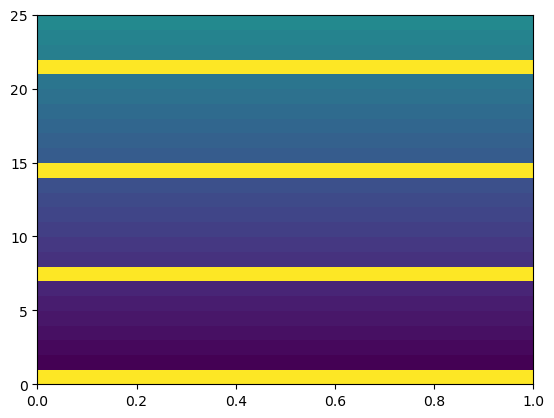

In [5]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.pcolor(arr.reshape(len(arr),1))
#ax.imshow(square, interpolation='none')
plt.show()

#### **2. De Boxplot**

Een boxplot representeert in 1 oogopslag de beschrijvende statische gegevens van je dataset. 
Het toont de spreiding van de data, de mediaan, de modus, outliers en alle quartielen. Voor een defintie van deze statische maten zie bvb [hier](https://blog.bijleshuis.be/statistiek-centrummaten-spreidingsmaten)

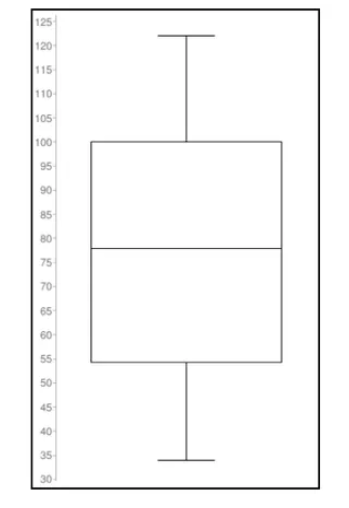

Hoe je met matplotlib een boxplot maakt en wat je er kan van aflezen vind je 
[hier](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html) 

Bovenstaande boxplot uit [ref 1](https://blog.bijleshuis.be/statistiek-centrummaten-spreidingsmaten) geeft volgende 5 getallen samenvatting : 34, 55, 78,50, 100 en 122. Wat stellen deze getallen voor?


__Oefening 3__ 

Gebruik de numpy functie `randn` uit de random module om 3 vectoren van normaal gedistribueerde getallen te genereren. Geef vector **x** lengte 1000, vector **y** lengte 500 en vector **z** lengte 100. Gebruik een vaste seed voor je pseudo random generator.

Plot nu voor **x**, **y** en **z** een boxplot om de spreiding in de gegenereerde data te visualiseren. Geef je plot een horizontale orientatie, zorg ervoor dat de labels zichtbaar zijn. Toon de 3 plots op 1 figuur, duid de mediaan aan in het rood en het gemiddelde als een purpere lijn.

Gebruik numpy functies om de 5 getallen samenvatting zelf te berekenen voor **x**, **y** en **z**. Bepaal ook de modus en de range.


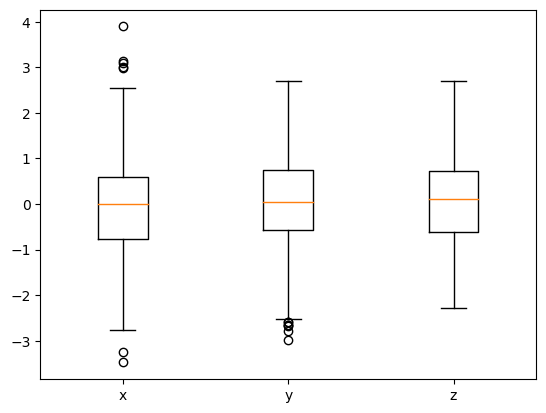

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

x = np.random.randn(1000)
y = np.random.randn(500)
z = np.random.randn(100)

_, ax = plt.subplots()
ax.boxplot([x,y,z],labels=('x','y','z'))

plt.show()

#### **3. Het histogram**

Een histogram verdeelt je continue data over interval (bins) en toont de hoeveelheid (frequency) data in elke bin. Meestal is elke bin even breed. Een bin is een half open interval, met de ondergrens inbegrepen, maar de bovengrens niet. Alleen de laatste bin is een gesloten interval.

Een histogram kan je plotten via de `plt.hist` functie, zie verder ook [hier](https://matplotlib.org/stable/gallery/statistics/hist.html)

__Oefening 4__

4.1 Gebruik de `np.histogram` functie om je data van vector **x** en vector**y** te verdelen over bins. Laat het aantal bins automatisch genereren. Wat krijg je terug als resultaat?

4.2 Plot 2 histograms (1 voor **x** en 1 voor **y**) via de subplot functie. Je 2 plots staan dus in 1 figuur naast elkaar. Plaats labels op de assen. 

4.3 Plot 1 multihistogram. Genereer hiertoe een 2dim array **v** met als shape (1000,2) en gebruik opnieuw de functie 
`randn` om de getallen te genereren via een normale verdeling. Gebruik nu 10 bins in je histogram en geef de data van elke kolom een andere kleur via een colors list die je vooraf definieert. Voeg tevens een legende toe aan je figuur, voorzie je assen ook steeds van een label.




[  3  18  87 220 270 241 120  33   7   1]
[-3.47611371 -2.73892815 -2.00174259 -1.26455704 -0.52737148  0.20981408
  0.94699964  1.68418519  2.42137075  3.15855631  3.89574187]

[  9  10  25  60 106 111  87  54  27  11]
[-2.98448283 -2.41602184 -1.84756084 -1.27909985 -0.71063885 -0.14217785
  0.42628314  0.99474414  1.56320513  2.13166613  2.70012713]


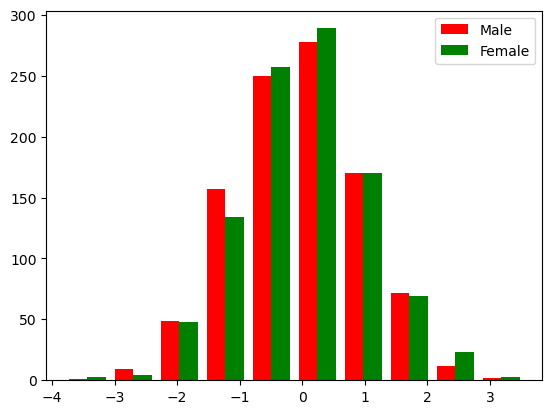

In [7]:
import numpy as np
import matplotlib.pyplot as plt
xfreq, xedges = np.histogram(x, bins=10)
yfreq, yedges = np.histogram(y, bins=10)
print(xfreq)
print(xedges, end="\n\n")
print(yfreq)
print(yedges)

v = np.random.randn(1000,2)
colors = ['red', 'green']
plt.hist(v, bins=10, color=colors)
plt.legend(['Male', 'Female'])
plt.show()

#### **4.Bar Plot**

Daar waar een histogram de frequentie verdeling van een continue veranderlijke toont, 
zal een bar plot de aantallen tonen van een discrete variabele die bestaat uit een eindig aantal categoriën.

Een bar plot kan je maken via de `plt.bar`functie.

 _Tip:_ https://www.machinelearningplus.com/plots/bar-plot-in-python/

**_Oefening 5_** : Plot een bar chart met de telresultaten van de maandkalender uit oef 11.1 uit het labo van vorige week . Op de x-as bevinden zich de maanden, op de y-as het aantal jarigen in die maand. Gebruik de dictionary waarin maanden de keys en als values het aantal jarigen in die maand zijn. Merk op, een maand is een categorie variabele, er zijn immers slechts 12 mogelijke maanden. Zijn in het gegeven voorbeeld alle maanden vertegenwoordigd?

_Tip_ Het handigste is om je dictionary uit oef 11.1 op te slaan naar een pickle file en deze hier terug uit te lezen, importeer de module `pickle` en gebruik de `dump` en `loads` functies. Zie ook : <https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/>



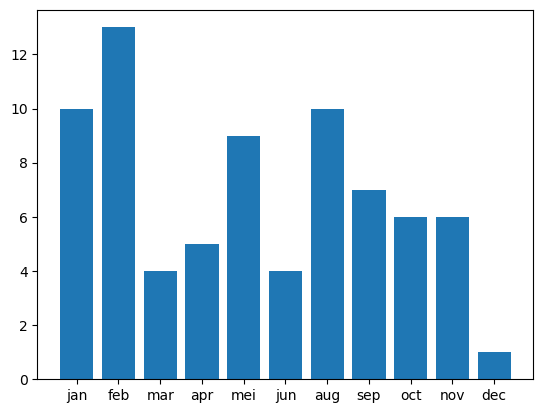

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open("dictionary.txt","rb") as file:
    data = pickle.loads(file.read())

# omzetten naar bruikbaardere data
names = ["",'jan',"feb","mar","apr","mei","jun","jul","aug","sep","oct","nov","dec"]
d = {names[key]:value for (key, value) in data.items()}

keys = [key for key in d.keys()]
values = [len(list(value)) for value in d.values()]

plt.bar(keys, values)
#ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.show()

#### 5. **Line plots - transformaties plotten**

Een lijn plot of x-y plot visualiseert 2 dimensionele datapunten $(x_i,y_i)$ die al dan niet verbonden zijn door een lijn. Op de horizontale as duid je de datapunten $x_i$ aan en trek je een recht door $x_i$ loodrecht op de horizontale as. Op de verticale as toon je de overeenkomstige datapunten $y_i$ aan en trek je een rechte loodrecht op de verticale as door $y_i$. Daar waar de loodrechten snijden bevinden zich de koppels $(x_i,y_i)$. De y-waarden zijn meestal, de overeenkomstige x-waarden waar een functie oplosgelaten is. Wanneer de koppels verbonden worden door een lijn, bekom je het visuele functieverloop van de functie.

__Oefening 6__ Een functie plotten

**6.1** Maak een vector **x** met als punten 0,1,2, ..., 20. Gebruik hiervoor de `numpy.arrange` functie

**6.2** Bereken nu de **y** vector als volgt :  \begin{equation*}  y = 5 + 2x \end{equation*}
    
**6.3** plot de $x,y$ waarden via de `plt.plot`functie. Voeg labels toe aan de assen en voorzie ook een legende.

**4.4** Voeg nu random noise toe aan de y waarden. Genereer een vector van 21 errors die random gegenereerd worden volgens een normale verdeling en tel deze op bij de y-waarden.
    plot nu ook de $x, y_{noise}$ waarden op dezelfde grafiek.
    
_Tip_ : Speel met kleuren en lijnestyles, zie : https://www.machinelearningplus.com/plots/matplotlib-line-plot/

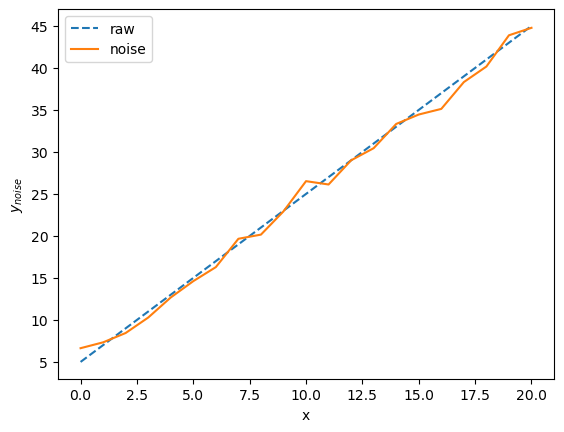

In [22]:
import numpy as np

x = np.arange(0,21,1)
ynoise = np.random.randn(21)
y = 5+2*x
yerr = y+ynoise
_, ax = plt.subplots()
ax.plot(x, y, linestyle='dashed', label = "raw")
ax.plot(x, yerr, label = "noise")#, linestyle='dashdot');
#plt.plot(x, y,linestyle = '--')
#plt.plot(x,y, color='green', linestyle=':')
ax.legend()

plt.xlabel("x")
plt.ylabel("$y_{noise}$")
plt.show()

__Oefening 7__ Oplossen van een stelsel van lineaire vergelijkingen adhv matrices

Gegeven volgend stelsel : 

\begin{equation*}
\begin{array}{cc}
        y &=& 6x \\
        y &=& -x + 8
\end{array}
\end{equation*}


**7.1** Zoek enerzijds een oplossing via de formule $\bf{x} = \bf{A}^{-1} \bf{b}$ (zie slides : zoek eerst $\bf{A}, \bf{A}^{-1}$ en $\bf{b}$)

**7.2** Zoek anderzijds een oplossing door de twee rechten te plotten en visueel het snijpunt te zoeken. 

In [10]:
import numpy as np

'''
y - 6x = 0
y + x  = 8
-----    -
  A      B
'''
A = np.array([[1,-6],[1,1]])

A_inv = np.linalg.inv(A)
b= np.array([0,8])
solve1 = np.linalg.solve(A,b)
solve2 = A_inv@b
print(solve1)
print(solve2)

[6.85714286 1.14285714]
[6.85714286 1.14285714]


__Oefening 8__ Lineaire transformaties en random punten

**8.1** Gebruik opnieuw de $numpy.random$ module voor het genereren van een array met 10 random **x** en 10 random **y** waarden volgens een normale verdeling. 

**8.2** Transformeer vervolgens deze 10 random (x,y) coordinaten naar 10 nieuwe coordinaten via volgende lineaire transformatie :
\begin{equation*}
\bf{A} = 
\begin{bmatrix}
-3 & 0 \\
0 & 5
\end{bmatrix}
\end{equation*}

**8.3** Bereken de determinant van de matrix. (dit geeft je alvast informatie over het type transformatie.)

**8.4** Plot de originele 10 random coordinaten (verbindt ze via een lijn) en doe hetzelfde met de getransformeerde coordinaten (maar in een andere kleur). 

determinant of A: -15.0
scale by -3 on x axis, by 5 on y axis


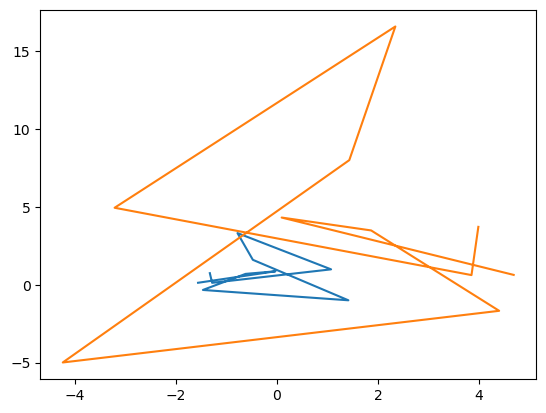

In [11]:
np.random.seed(50)
A = np.array([[-3,0],[0,5]])
print(f"determinant of A: {np.linalg.det(A)}")
print("scale by -3 on x axis, by 5 on y axis")
#generated random points
M, N = 10, 10
x = np.random.randn(M)
y = np.random.randn(N)

s = np.stack((x,y))
scaled = A@s
plt.plot(x,y)
plt.plot(scaled[0],scaled[1])
plt.show()